In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv. 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
type_count_df = application_df['APPLICATION_TYPE'].value_counts()
type_count_df

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count_df[type_count_df<250].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
classification_count_df = application_df['CLASSIFICATION'].value_counts()
classification_count_df

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1570        1
C1900        1
C1728        1
C1820        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_count_df[classification_count_df < 1000].index)
# Replace in dataframe
for app in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [10]:
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Merge one-hot encoded features and drop the originals
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [18]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 477us/step - loss: 60384.8947 - accuracy: 0.5033
Epoch 2/100
804/804 [==============================] - 0s 484us/step - loss: 48331.2178 - accuracy: 0.4737
Epoch 3/100
804/804 [==============================] - 0s 476us/step - loss: 12229.2657 - accuracy: 0.5033
Epoch 4/100
804/804 [==============================] - 0s 482us/step - loss: 32230.4467 - accuracy: 0.5102
Epoch 5/100
804/804 [==============================] - 0s 481us/step - loss: 8542.0750 - accuracy: 0.5023
Epoch 6/100
804/804 [==============================] - 0s 482us/step - loss: 7189.7619 - accuracy: 0.5008
Epoch 7/100
804/804 [==============================] - 0s 480us/step - loss: 4875.7510 - accuracy: 0.5015
Epoch 8/100
804/804 [==============================] - 0s 496us/step - loss: 2531.9937 - accuracy: 0.5283
Epoch 9/100
804/804 [==============================] - 0s 500us/step - loss: 9691.8360 - accuracy: 0.5392
Epoch 10/100
804/804 [====================

804/804 [==============================] - 0s 496us/step - loss: 0.6914 - accuracy: 0.5301
Epoch 80/100
804/804 [==============================] - 0s 482us/step - loss: 0.6910 - accuracy: 0.5332
Epoch 81/100
804/804 [==============================] - 0s 482us/step - loss: 0.6905 - accuracy: 0.5373
Epoch 82/100
804/804 [==============================] - 0s 484us/step - loss: 0.6909 - accuracy: 0.5340
Epoch 83/100
804/804 [==============================] - 0s 485us/step - loss: 0.6912 - accuracy: 0.5313
Epoch 84/100
804/804 [==============================] - 0s 479us/step - loss: 0.6914 - accuracy: 0.5301
Epoch 85/100
804/804 [==============================] - 0s 481us/step - loss: 0.6906 - accuracy: 0.5358
Epoch 86/100
804/804 [==============================] - 0s 490us/step - loss: 0.6913 - accuracy: 0.5305
Epoch 87/100
804/804 [==============================] - 0s 486us/step - loss: 0.6909 - accuracy: 0.5340
Epoch 88/100
804/804 [==============================] - 0s 490us/step - loss:

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7761 - accuracy: 0.6980
Loss: 0.7760608792304993, Accuracy: 0.6979591846466064


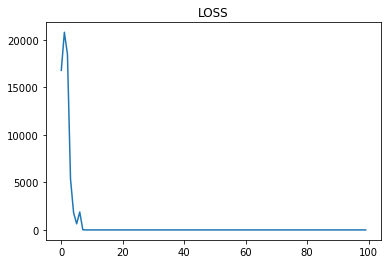

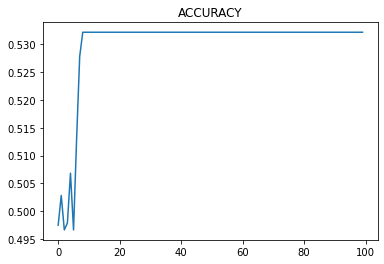

In [20]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

# Trial 3, keep 'status'

In [22]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

In [23]:
#repeat with 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [24]:
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [25]:
type_count_df = application_df['APPLICATION_TYPE'].value_counts()

In [26]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count_df[type_count_df<250].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [27]:
classification_count_df = application_df['CLASSIFICATION'].value_counts()

In [28]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_count_df[classification_count_df < 1000].index)
# Replace in dataframe
for app in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [29]:
#drop features where nearly all rows are the same
application_df = application_df.drop(columns = ['SPECIAL_CONSIDERATIONS'])

In [30]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [31]:
# Merge one-hot encoded features and drop the originals
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3360      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [38]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 490us/step - loss: 63065.0689 - accuracy: 0.4924
Epoch 2/100
804/804 [==============================] - 0s 482us/step - loss: 12795.8459 - accuracy: 0.4944
Epoch 3/100
804/804 [==============================] - 0s 474us/step - loss: 1882.6260 - accuracy: 0.4878
Epoch 4/100
804/804 [==============================] - 0s 482us/step - loss: 1917.5405 - accuracy: 0.4974 0s - loss: 2895.1597 - accuracy: 0.
Epoch 5/100
804/804 [==============================] - 0s 494us/step - loss: 26.4097 - accuracy: 0.5318
Epoch 6/100
804/804 [==============================] - 0s 475us/step - loss: 0.6972 - accuracy: 0.5349
Epoch 7/100
804/804 [==============================] - 0s 474us/step - loss: 0.6917 - accuracy: 0.5344
Epoch 8/100
804/804 [==============================] - 0s 476us/step - loss: 0.6911 - accuracy: 0.5327
Epoch 9/100
804/804 [==============================] - 0s 482us/step - loss: 0.6909 - accuracy: 0.5332
Epoch 10/100
804/804 [

Epoch 79/100
804/804 [==============================] - 0s 476us/step - loss: 0.6912 - accuracy: 0.5315
Epoch 80/100
804/804 [==============================] - 0s 475us/step - loss: 0.6909 - accuracy: 0.5338
Epoch 81/100
804/804 [==============================] - 0s 479us/step - loss: 0.6916 - accuracy: 0.5284
Epoch 82/100
804/804 [==============================] - 0s 479us/step - loss: 0.6908 - accuracy: 0.5347
Epoch 83/100
804/804 [==============================] - 0s 490us/step - loss: 0.6916 - accuracy: 0.5284
Epoch 84/100
804/804 [==============================] - 0s 497us/step - loss: 0.6916 - accuracy: 0.5282
Epoch 85/100
804/804 [==============================] - 0s 486us/step - loss: 0.6904 - accuracy: 0.5370
Epoch 86/100
804/804 [==============================] - 0s 496us/step - loss: 0.6910 - accuracy: 0.5332
Epoch 87/100
804/804 [==============================] - 0s 495us/step - loss: 0.6912 - accuracy: 0.5315
Epoch 88/100
804/804 [==============================] - 0s 489us

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6505 - accuracy: 0.6540
Loss: 0.6505045890808105, Accuracy: 0.6539941430091858


In [ ]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

# Trial 4, keep 'is_successful'

In [40]:
#repeat with 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [41]:
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [42]:
type_count_df = application_df['APPLICATION_TYPE'].value_counts()

In [43]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count_df[type_count_df<250].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [44]:
classification_count_df = application_df['CLASSIFICATION'].value_counts()

In [45]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_count_df[classification_count_df < 1000].index)
# Replace in dataframe
for app in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [46]:
#drop features where nearly all rows are the same
application_df = application_df.drop(columns = ['STATUS'])

In [47]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [48]:
# Merge one-hot encoded features and drop the originals
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [51]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                3440      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [55]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 469us/step - loss: 68358.3612 - accuracy: 0.4968
Epoch 2/100
804/804 [==============================] - 0s 467us/step - loss: 68917.3090 - accuracy: 0.5183
Epoch 3/100
804/804 [==============================] - 0s 472us/step - loss: 34262.2762 - accuracy: 0.5121
Epoch 4/100
804/804 [==============================] - 0s 476us/step - loss: 4676.6391 - accuracy: 0.5252
Epoch 5/100
804/804 [==============================] - 0s 477us/step - loss: 38527.6117 - accuracy: 0.4894
Epoch 6/100
804/804 [==============================] - 0s 476us/step - loss: 11424.5768 - accuracy: 0.5318
Epoch 7/100
804/804 [==============================] - 0s 472us/step - loss: 7615.2429 - accuracy: 0.5055
Epoch 8/100
804/804 [==============================] - 0s 474us/step - loss: 42025.1675 - accuracy: 0.4825
Epoch 9/100
804/804 [==============================] - 0s 495us/step - loss: 4698.9567 - accuracy: 0.5033
Epoch 10/100
804/804 [==================

804/804 [==============================] - 0s 466us/step - loss: 0.6911 - accuracy: 0.5331
Epoch 80/100
804/804 [==============================] - 0s 460us/step - loss: 0.6916 - accuracy: 0.5283
Epoch 81/100
804/804 [==============================] - 0s 462us/step - loss: 0.6912 - accuracy: 0.5322
Epoch 82/100
804/804 [==============================] - 0s 460us/step - loss: 0.6911 - accuracy: 0.5326
Epoch 83/100
804/804 [==============================] - 0s 471us/step - loss: 0.6911 - accuracy: 0.5327
Epoch 84/100
804/804 [==============================] - 0s 470us/step - loss: 0.6915 - accuracy: 0.5291
Epoch 85/100
804/804 [==============================] - 0s 467us/step - loss: 0.6917 - accuracy: 0.5283
Epoch 86/100
804/804 [==============================] - 0s 482us/step - loss: 0.6913 - accuracy: 0.5311
Epoch 87/100
804/804 [==============================] - 0s 471us/step - loss: 0.6914 - accuracy: 0.5305
Epoch 88/100
804/804 [==============================] - 0s 465us/step - loss:

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.4339 - accuracy: 0.5325
Loss: 1.4339264631271362, Accuracy: 0.5324781537055969


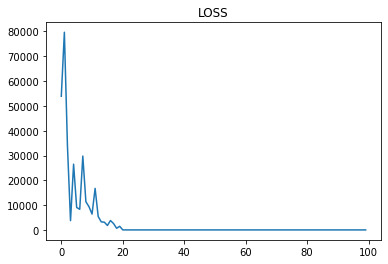

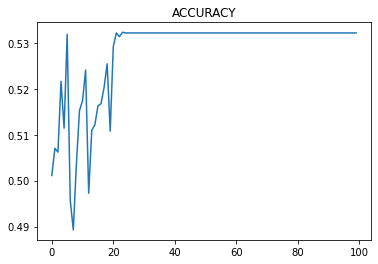

In [57]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

# Trial 4, keep 'is_successful' and 'status', increase neurons

In [122]:
#repeat with 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [123]:
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [124]:
type_count_df = application_df['APPLICATION_TYPE'].value_counts()

In [125]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count_df[type_count_df<250].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [126]:
classification_count_df = application_df['CLASSIFICATION'].value_counts()

In [127]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_count_df[classification_count_df < 1000].index)
# Replace in dataframe
for app in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [128]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [129]:
# Merge one-hot encoded features and drop the originals
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [130]:
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [131]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [132]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 80)                3440      
_________________________________________________________________
dense_36 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [134]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [135]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 474us/step - loss: 13491.1163 - accuracy: 0.5256
Epoch 2/100
804/804 [==============================] - 0s 486us/step - loss: 0.6906 - accuracy: 0.5380
Epoch 3/100
804/804 [==============================] - 0s 472us/step - loss: 0.6912 - accuracy: 0.5324
Epoch 4/100
804/804 [==============================] - 0s 470us/step - loss: 0.6909 - accuracy: 0.5351
Epoch 5/100
804/804 [==============================] - 0s 470us/step - loss: 0.6918 - accuracy: 0.5279
Epoch 6/100
804/804 [==============================] - 0s 467us/step - loss: 0.6905 - accuracy: 0.5374
Epoch 7/100
804/804 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.53 - 0s 472us/step - loss: 0.6908 - accuracy: 0.5353
Epoch 8/100
804/804 [==============================] - 0s 466us/step - loss: 0.6910 - accuracy: 0.5343
Epoch 9/100
804/804 [==============================] - 0s 472us/step - loss: 0.6911 - accuracy: 0.5342
Epoch 10/100
804/804 [=====

804/804 [==============================] - 0s 466us/step - loss: 0.6916 - accuracy: 0.5307
Epoch 80/100
804/804 [==============================] - 0s 465us/step - loss: 0.6909 - accuracy: 0.5349
Epoch 81/100
804/804 [==============================] - 0s 462us/step - loss: 0.6907 - accuracy: 0.5353
Epoch 82/100
804/804 [==============================] - 0s 470us/step - loss: 0.6910 - accuracy: 0.5348
Epoch 83/100
804/804 [==============================] - 0s 475us/step - loss: 0.6912 - accuracy: 0.5339
Epoch 84/100
804/804 [==============================] - 0s 460us/step - loss: 0.6909 - accuracy: 0.5354
Epoch 85/100
804/804 [==============================] - 0s 485us/step - loss: 0.6913 - accuracy: 0.5327
Epoch 86/100
804/804 [==============================] - 0s 462us/step - loss: 0.6914 - accuracy: 0.5308
Epoch 87/100
804/804 [==============================] - 0s 467us/step - loss: 0.6915 - accuracy: 0.5308
Epoch 88/100
804/804 [==============================] - 0s 467us/step - loss:

In [136]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6892 - accuracy: 0.5727
Loss: 0.6892444491386414, Accuracy: 0.5727113485336304


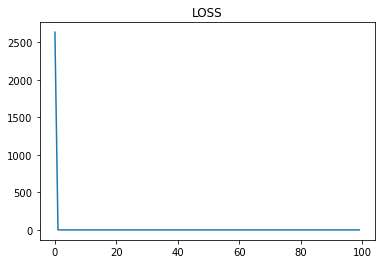

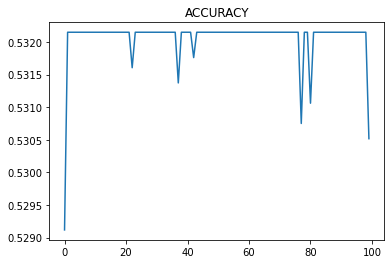

In [137]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

# Keep number of neurons, change to tanh

In [138]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 80)                3440      
_________________________________________________________________
dense_39 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [140]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [141]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 477us/step - loss: 0.6962 - accuracy: 0.5150
Epoch 2/100
804/804 [==============================] - 0s 465us/step - loss: 0.6926 - accuracy: 0.5207
Epoch 3/100
804/804 [==============================] - 0s 461us/step - loss: 0.6916 - accuracy: 0.5334
Epoch 4/100
804/804 [==============================] - 0s 464us/step - loss: 0.6922 - accuracy: 0.5292
Epoch 5/100
804/804 [==============================] - 0s 460us/step - loss: 0.6918 - accuracy: 0.5309
Epoch 6/100
804/804 [==============================] - 0s 469us/step - loss: 0.6926 - accuracy: 0.5225
Epoch 7/100
804/804 [==============================] - 0s 470us/step - loss: 0.6923 - accuracy: 0.5265
Epoch 8/100
804/804 [==============================] - 0s 485us/step - loss: 0.6921 - accuracy: 0.5283
Epoch 9/100
804/804 [==============================] - 0s 490us/step - loss: 0.6915 - accuracy: 0.5292
Epoch 10/100
804/804 [==============================] - 0s 496us/step - l

804/804 [==============================] - 0s 484us/step - loss: 0.6920 - accuracy: 0.5288
Epoch 80/100
804/804 [==============================] - 0s 494us/step - loss: 0.6908 - accuracy: 0.5386
Epoch 81/100
804/804 [==============================] - 0s 490us/step - loss: 0.6922 - accuracy: 0.5235
Epoch 82/100
804/804 [==============================] - 0s 519us/step - loss: 0.6922 - accuracy: 0.5269
Epoch 83/100
804/804 [==============================] - 0s 481us/step - loss: 0.6917 - accuracy: 0.5285
Epoch 84/100
804/804 [==============================] - 0s 495us/step - loss: 0.6915 - accuracy: 0.5309
Epoch 85/100
804/804 [==============================] - 0s 491us/step - loss: 0.6922 - accuracy: 0.5265
Epoch 86/100
804/804 [==============================] - 0s 496us/step - loss: 0.6916 - accuracy: 0.5312
Epoch 87/100
804/804 [==============================] - 0s 484us/step - loss: 0.6915 - accuracy: 0.5306
Epoch 88/100
804/804 [==============================] - 0s 467us/step - loss:

In [142]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6894 - accuracy: 0.5399
Loss: 0.6894060373306274, Accuracy: 0.539941668510437


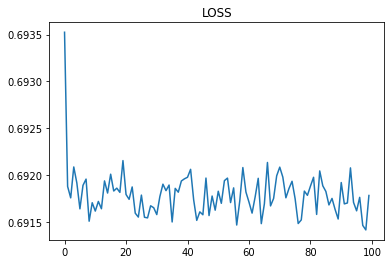

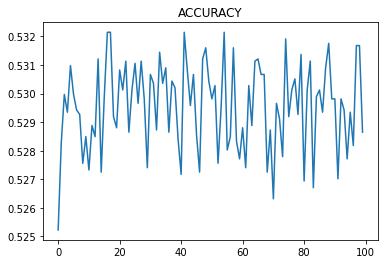

In [143]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

# Keep number of neurons, add hidden layer

In [155]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 100

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Thirdhidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 100)               4300      
_________________________________________________________________
dense_50 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_51 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 101       
Total params: 24,601
Trainable params: 24,601
Non-trainable params: 0
_________________________________________________________________


In [156]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [157]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [158]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 588us/step - loss: 0.6943 - accuracy: 0.5238
Epoch 2/100
804/804 [==============================] - 0s 595us/step - loss: 0.6937 - accuracy: 0.5118
Epoch 3/100
804/804 [==============================] - 0s 608us/step - loss: 0.6933 - accuracy: 0.5151
Epoch 4/100
804/804 [==============================] - 0s 600us/step - loss: 0.6917 - accuracy: 0.5240
Epoch 5/100
804/804 [==============================] - 0s 612us/step - loss: 0.6918 - accuracy: 0.5278
Epoch 6/100
804/804 [==============================] - 1s 629us/step - loss: 0.6918 - accuracy: 0.5287
Epoch 7/100
804/804 [==============================] - 1s 628us/step - loss: 0.6925 - accuracy: 0.5210
Epoch 8/100
804/804 [==============================] - 0s 603us/step - loss: 0.6927 - accuracy: 0.5210
Epoch 9/100
804/804 [==============================] - 1s 630us/step - loss: 0.6930 - accuracy: 0.5198
Epoch 10/100
804/804 [==============================] - 0s 593us/step - l

804/804 [==============================] - 0s 611us/step - loss: 0.6916 - accuracy: 0.5286
Epoch 80/100
804/804 [==============================] - 0s 612us/step - loss: 0.6901 - accuracy: 0.5392
Epoch 81/100
804/804 [==============================] - 0s 613us/step - loss: 0.6908 - accuracy: 0.5355
Epoch 82/100
804/804 [==============================] - 0s 600us/step - loss: 0.6905 - accuracy: 0.5369
Epoch 83/100
804/804 [==============================] - 0s 605us/step - loss: 0.6918 - accuracy: 0.5257
Epoch 84/100
804/804 [==============================] - 0s 616us/step - loss: 0.6910 - accuracy: 0.5334
Epoch 85/100
804/804 [==============================] - 0s 607us/step - loss: 0.6903 - accuracy: 0.5379
Epoch 86/100
804/804 [==============================] - 0s 605us/step - loss: 0.6909 - accuracy: 0.5340
Epoch 87/100
804/804 [==============================] - 0s 599us/step - loss: 0.6909 - accuracy: 0.5342
Epoch 88/100
804/804 [==============================] - 0s 615us/step - loss:

In [154]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6873 - accuracy: 0.5528
Loss: 0.6872577667236328, Accuracy: 0.552769660949707


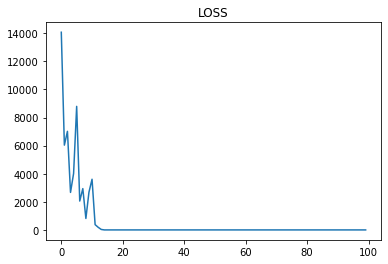

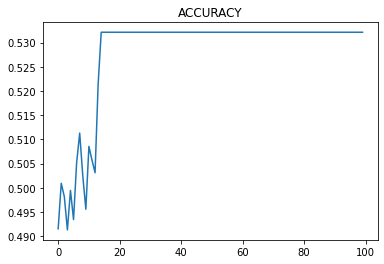

In [149]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()